In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('C:/Users/poongc/Desktop/AI/Weather_prediction/datasets/GlobalWeatherRepository.csv')
#df.head(5)

In [2]:
df.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40179 entries, 0 to 40178
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       40179 non-null  object 
 1   location_name                 40179 non-null  object 
 2   latitude                      40179 non-null  float64
 3   longitude                     40179 non-null  float64
 4   timezone                      40179 non-null  object 
 5   last_updated_epoch            40179 non-null  int64  
 6   last_updated                  40179 non-null  object 
 7   temperature_celsius           40179 non-null  float64
 8   temperature_fahrenheit        40179 non-null  float64
 9   condition_text                40179 non-null  object 
 10  wind_mph                      40179 non-null  float64
 11  wind_kph                      40179 non-null  float64
 12  wind_degree                   40179 non-null  int64  
 13  w

In [4]:
len(df)

40179

In [5]:
def time_sep(n):
    date=n
    obj=datetime.strptime(date,"%Y-%m-%d %H:%M")
    date=obj.date()
    time=obj.time()
    return (date,time)

In [6]:
df[['Date','Time']]=df['last_updated'].apply(time_sep).apply(pd.Series)

In [7]:
df=df.sort_values(['country','Date','Time'],ascending=False)

In [8]:
df.head(5)

country  location_name  latitude  longitude           timezone  \
11592         火鸡       -Kingdom     38.85      34.65    Europe/Istanbul   
11484   كولومبيا     Costa Rica      6.43     -70.92     America/Bogota   
11547     Турция          Yaren     39.55      27.62    Europe/Istanbul   
11526     Польша         Beirut     51.12      17.53      Europe/Warsaw   
11504  Гватемала  New Guatemala     14.62     -90.53  America/Guatemala   

       last_updated_epoch      last_updated  temperature_celsius  \
11592          1720875600  2024-07-13 16:00                 29.7   
11484          1720875600  2024-07-13 08:00                 23.1   
11547          1720875600  2024-07-13 16:00                 34.0   
11526          1720875600  2024-07-13 15:00                 24.2   
11504          1720875600  2024-07-13 07:00                 15.9   

       temperature_fahrenheit condition_text  ...  air_quality_us-epa-index  \
11592                    85.4          Sunny  ...                         1   
11484                    73.5           Mist  ...                         1   
11547                    93.2  Partly cloudy  ...                         1   
11526                    75.5         Cloudy  ...                         1   
11504                    60.6           Mist  ...                         3   

       air_quality_gb-defra-index   sunrise    sunset  moonrise   moonset  \
11592                           1  05:28 AM  08:07 PM  12:32 PM  11:59 PM   
11484                           1  05:23 AM  06:02 PM  11:25 AM  11:30 PM   
11547                           1  05:54 AM  08:37 PM  01:02 PM  12:06 AM   
11526                           1  04:50 AM  09:00 PM  12:56 PM  11:51 PM   
11504                           4  05:41 AM  06:35 PM  11:54 AM  11:52 PM   

          moon_phase  moon_illumination        Date      Time  
11592  First Quarter                 41  2024-07-13  16:00:00  
11484  First Quarter                 41  2024-07-13  08:00:00  
11547  First Quarter                 41  2024-07-13  16:00:00  
11526  First Quarter                 41  2024-07-13  15:00:00  
11504  First Quarter                 41  2024-07-13  07:00:00  

[5 rows x 43 columns]

In [9]:
country_count=df['country'].value_counts()
valid_country=country_count[country_count>=200].index
df=df[df['country'].isin(valid_country)]

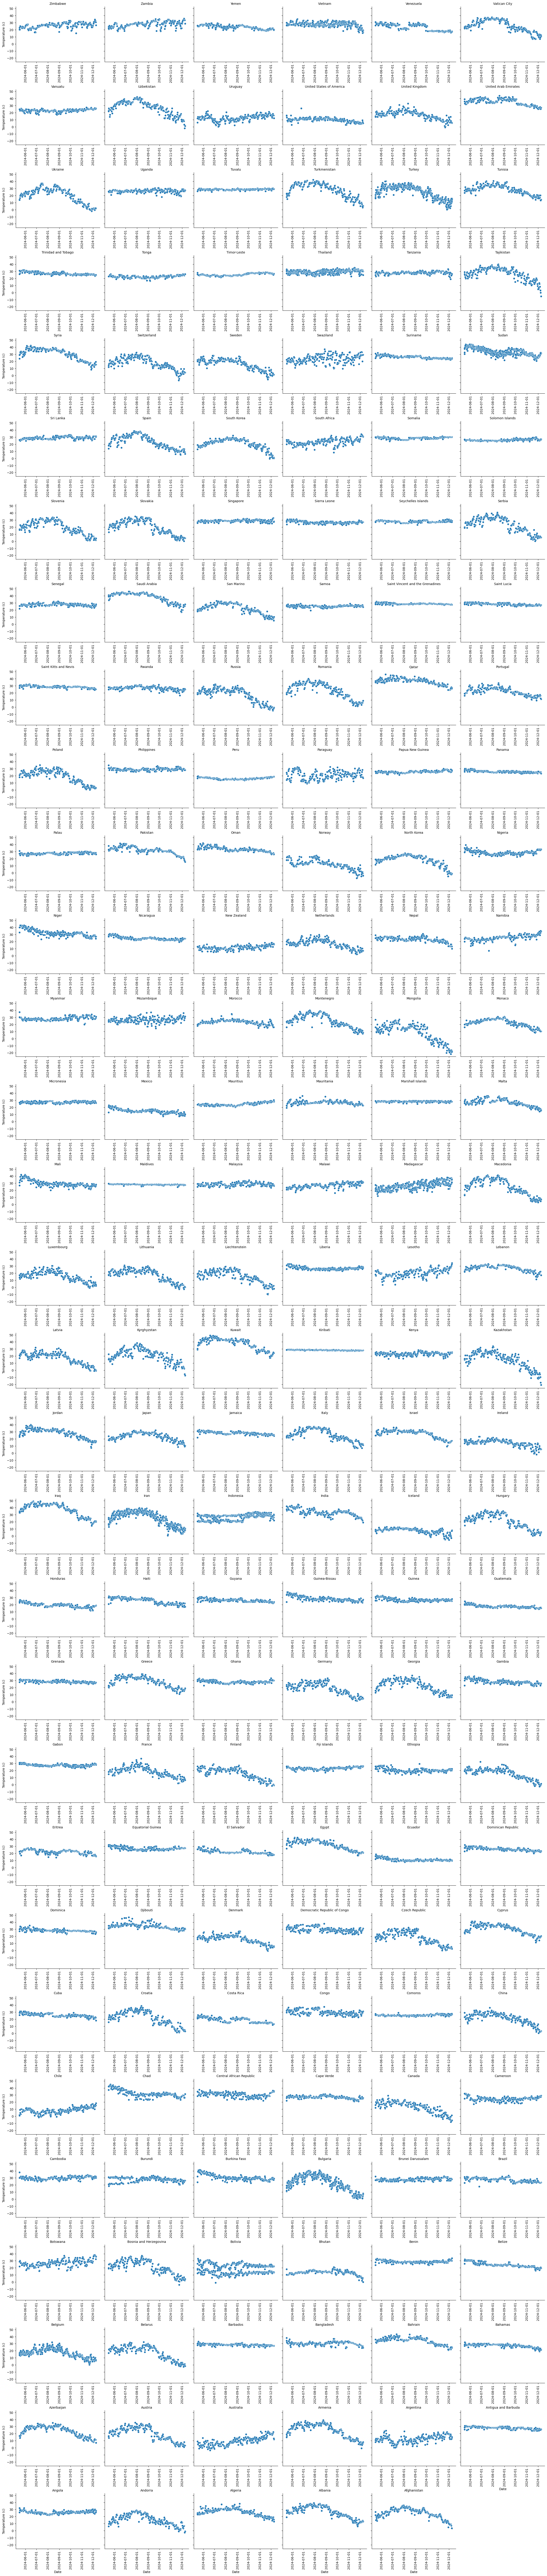

In [10]:
g = sns.FacetGrid(df, col="country", col_wrap=6, height=4, sharey=True, sharex=False)
g.map(sns.scatterplot, "Date",'temperature_celsius')
g.set_axis_labels( "Date",'Temperature (c)')
g.set_titles("{col_name}")
g.set_xticklabels(rotation=90)
g.figure.subplots_adjust(top=0.9, hspace=0.5)
plt.show();

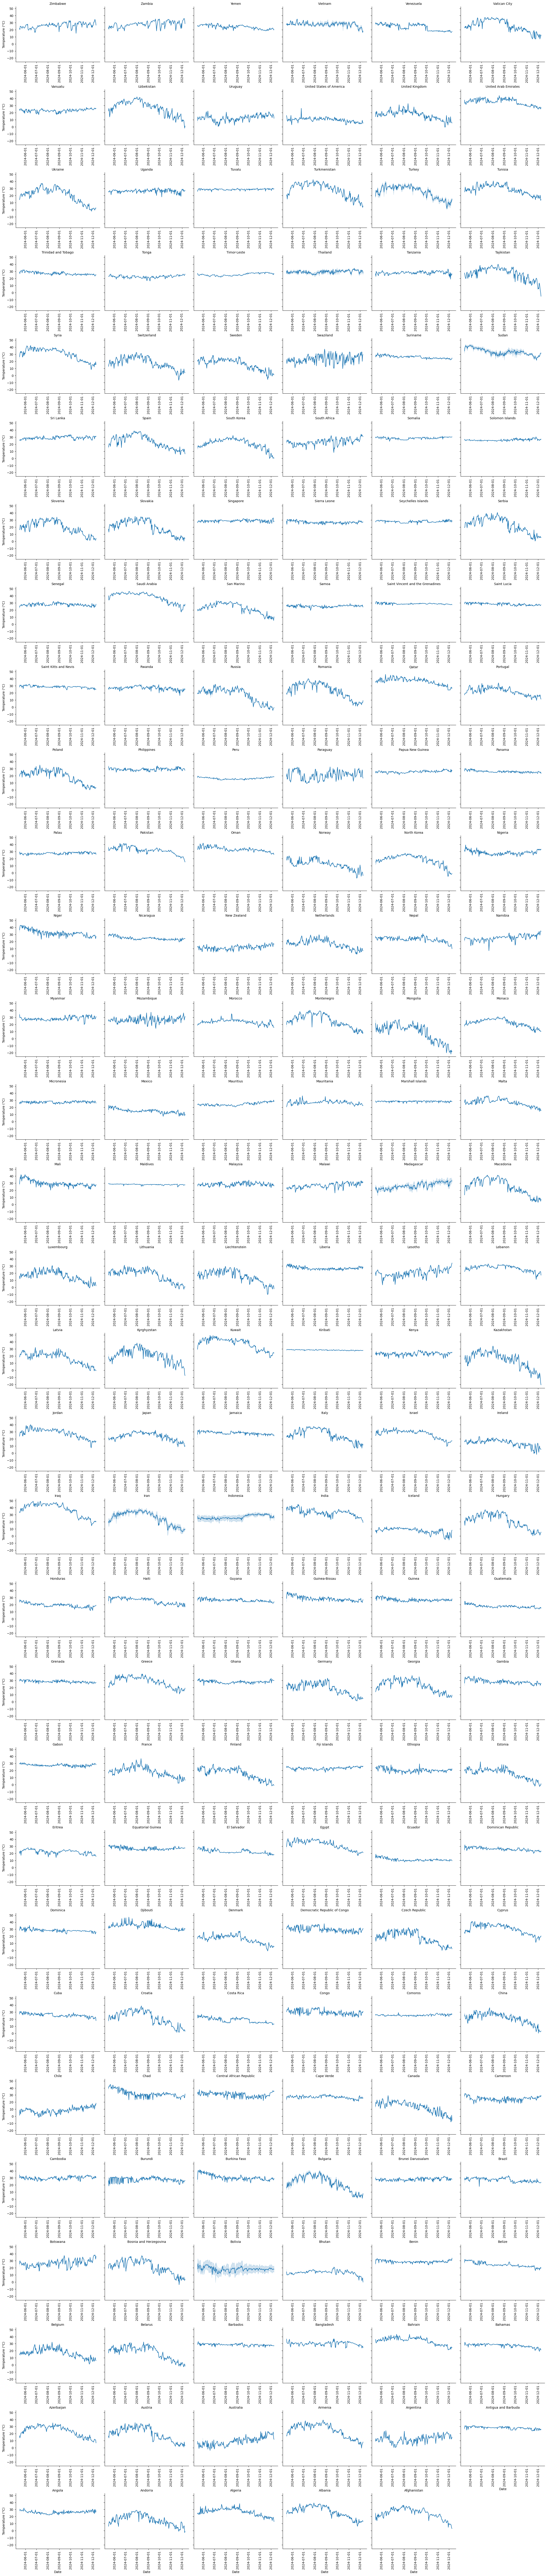

In [11]:
g = sns.FacetGrid(df, col="country", col_wrap=6, height=4, sharey=True,sharex=False)
g.map(sns.lineplot, "Date", "temperature_celsius")
g.set_axis_labels("Date", "Temperature (°C)")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=90)
g.figure.subplots_adjust(top=0.9, hspace=0.5)
plt.show();

In [12]:
def t_to_sec(t):
    return t.hour*3600+t.minute*60+t.second

df['Time_sec']=df['Time'].apply(t_to_sec)
df['Time_sin']=np.sin(2*np.pi*df['Time_sec']/86400)
df['Time_cos']=np.sin(2*np.pi*df['Time_sec']/86400)
df['Date_numeric'] = df['Date'].map(lambda x: x.toordinal()) 

In [13]:
df=pd.get_dummies(df,columns=['country'],drop_first=True)

In [14]:
df=df.replace({True:1,False:0})

C:\Users\poongc\AppData\Local\Temp\ipykernel_12404\3566451038.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace({True:1,False:0})


In [15]:
to_drop=['last_updated_epoch','last_updated','temperature_fahrenheit','condition_text','location_name','timezone',
         'pressure_in','precip_in','location_name','latitude','longitude','timezone','wind_kph','feels_like_celsius',
         'feels_like_fahrenheit','visibility_miles','gust_kph','moon_phase','wind_direction','sunrise','sunset','moonrise','moonset','Time',
         'Time_sec','Date','wind_degree']
df=df.drop(to_drop,axis=1)

In [16]:
df.to_csv('WeatherData.csv',index=False)